In [2]:
import os, sys

# 1. Compute the src/ directory (one level up from notebooks/)
notebooks_dir = os.getcwd()                            # e.g. …/graphworld/src/notebooks
src_dir       = os.path.abspath(os.path.join(notebooks_dir, os.pardir))
# 2. Prepend it to Python’s module search path
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

In [3]:
import logging
import pandas as pd

# Generator imports
from graph_world.generators.cabam_simulator import GenerateCABAMGraphWithFeatures
from graph_world.generators.sbm_simulator import GenerateStochasticBlockModelWithFeatures, MatchType, MakePi, MakeDegrees, MakePropMat
from graph_world.generators.lfr_simulator import GenerateLFRGraphWithFeatures

In [4]:
N = 512
M = 2
NUM_CLUSTERS = 4
SLOPE = 0.5
FEATURE_DIM = 16
EDGE_DIM = 4
INTER_LINK_STRENGTH = 0.95
P2Q = 16.0
POWER_EXPONENT = 2.0

In [5]:
cabam_graph = GenerateCABAMGraphWithFeatures(
    n=N,
    min_deg=M,
    inter_link_strength=INTER_LINK_STRENGTH,
    pi=MakePi(NUM_CLUSTERS, SLOPE),
    assortativity_type=1,
    temperature=0.5,
    feature_center_distance=1.0,
    feature_dim=FEATURE_DIM,
    num_feature_groups=NUM_CLUSTERS,
    feature_group_match_type=MatchType.GROUPED,
    feature_cluster_variance=1.0,
    edge_feature_dim=EDGE_DIM,
    edge_center_distance=0.0,
    edge_cluster_variance=1.0,
    normalize_features=True)
sbm_graph = GenerateStochasticBlockModelWithFeatures(
    num_vertices=N,
    num_edges=N*5,
    pi=MakePi(NUM_CLUSTERS, SLOPE),
    prop_mat=MakePropMat(NUM_CLUSTERS, P2Q),
    out_degs=MakeDegrees(POWER_EXPONENT, M, N),
    feature_center_distance=1.0,
    feature_dim=FEATURE_DIM,
    num_feature_groups=1,
    feature_group_match_type=MatchType.GROUPED,
    feature_cluster_variance=1.0,
    edge_feature_dim=EDGE_DIM,
    edge_center_distance=0.0,
    edge_cluster_variance=1.0,
    normalize_features=True)
lfr_graph = GenerateLFRGraphWithFeatures(
    n=N,
    avg_deg=5,
    max_deg=50,
    exponent=-2,
    min_community_size=25,
    max_community_size=150,
    community_exponent=-1,
    mixing_param=0.1,
    feature_center_distance=0.5,
    feature_dim=16,
    feature_group_match_type=MatchType.GROUPED,
    feature_cluster_variance=1.0,
    edge_feature_dim=4,
    edge_center_distance=0.0,
    edge_cluster_variance=1.0,
    normalize_features=True,
    num_tries=20
)

100%|██████████| 512/512 [00:00<00:00, 3080.55it/s]


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

colors = ['green', 'red', 'blue', 'orange', 'purple', 'yellow', 'black', 'cyan', 'pink', 'magenta']

def gt_to_nx(gt_graph, labels):
    nx_graph = nx.Graph()
    edge_list = [(int(e.source()), int(e.target())) for e in gt_graph.edges()]
    nx_graph.add_edges_from(edge_list)
    nx.set_node_attributes(nx_graph, {i: group for i, group in enumerate(labels)},
                           "group")
    return nx_graph

def plot_dataset(dataset):
    Gnx = gt_to_nx(dataset.graph, dataset.graph_memberships)
    Gnx = nx.algorithms.k_core(Gnx, 2)
    Gc = max(nx.algorithms.connected_components(Gnx), key=len)
    Gnx.remove_nodes_from([n for n in Gnx if n not in Gc])
    fig, ax = plt.subplots(figsize=(5,5))
    colormap = []
    for v in Gnx.nodes(data=True):
      colormap.append(colors[v[1]['group']])
    nx.draw(Gnx, pos=nx.spring_layout(Gnx), node_color=colormap, with_labels=False,
            node_size=40)

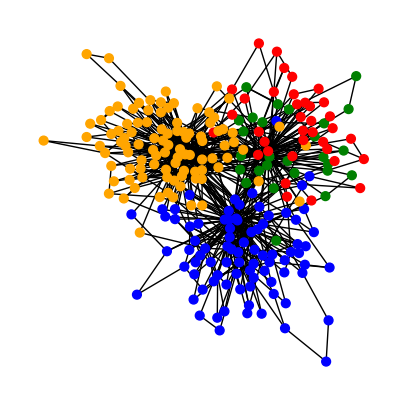

In [7]:
plot_dataset(sbm_graph)


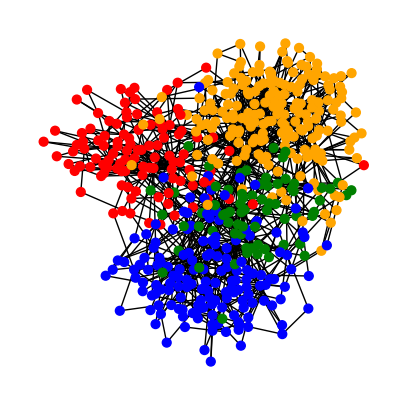

In [8]:
plot_dataset(cabam_graph)

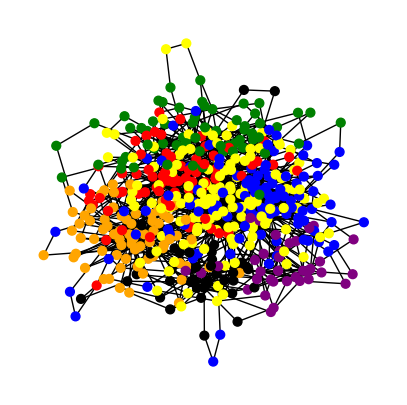

In [10]:
plot_dataset(lfr_graph)

In [11]:
import seaborn as sns
from collections import Counter
from matplotlib import pyplot as plot
from graph_world.metrics.graph_metrics import graph_metrics

def plot_power_law(dataset):
    metrics = graph_metrics(dataset.graph)
    print("power law estimate it %0.4f" % metrics['power_law_estimate'])
    dist = dataset.graph.get_out_degrees(list(dataset.graph.vertices()))
    ctr = Counter([int(i) for i in dist])
    degs = sorted(ctr.items())
    plt.loglog([deg for (deg, ct) in degs], 
               [ct for (deg, ct) in degs])
    plt.xlabel('Degree', fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.legend()
    plt.show()
    
    sns.displot(dist)
    plt.show()

power law estimate it 2.4599


/var/folders/xx/jrs09g7x5nb0vzsph61j259c0000gn/T/ipykernel_79657/748642211.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


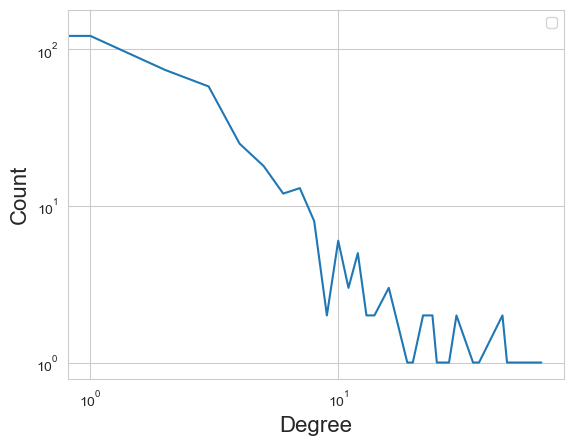

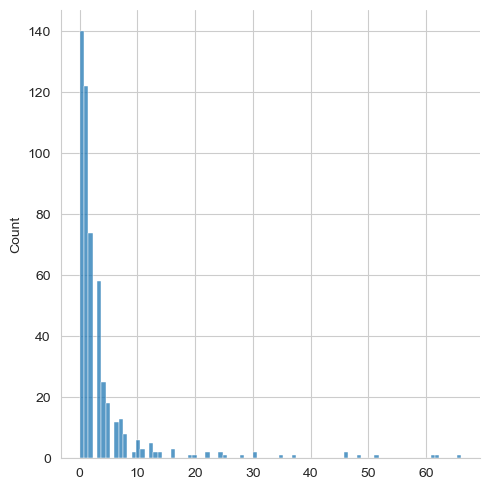

In [12]:
plot_power_law(sbm_graph)

power law estimate it 3.9700


/var/folders/xx/jrs09g7x5nb0vzsph61j259c0000gn/T/ipykernel_79657/748642211.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


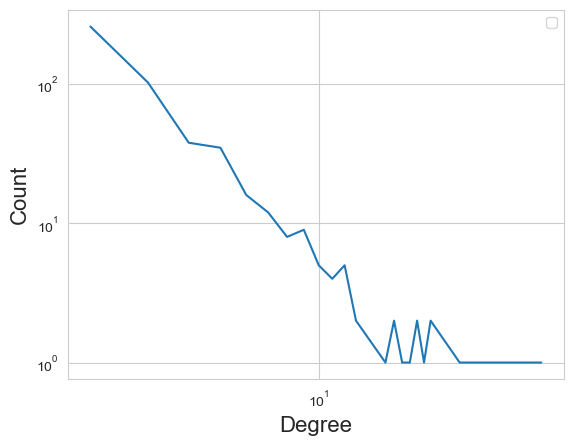

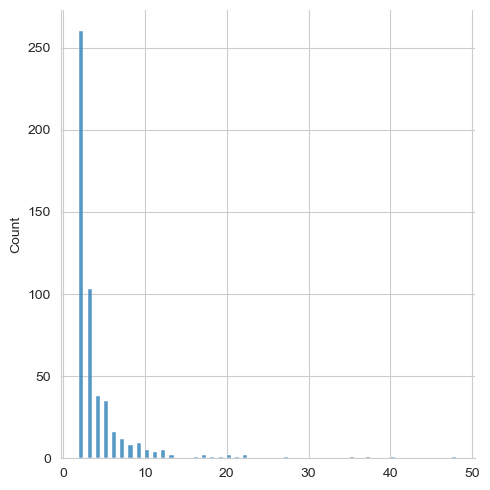

In [13]:
plot_power_law(cabam_graph)

power law estimate it 3.1185


/var/folders/xx/jrs09g7x5nb0vzsph61j259c0000gn/T/ipykernel_79657/748642211.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


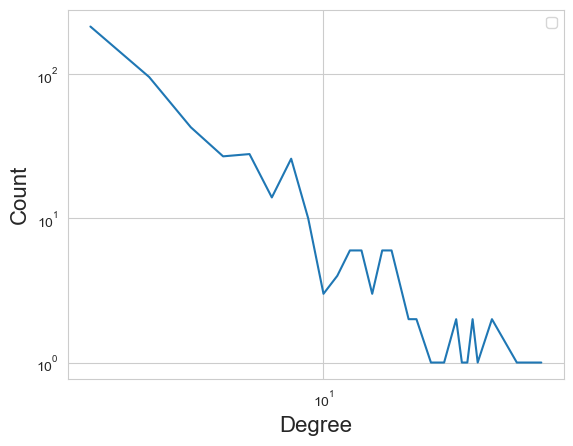

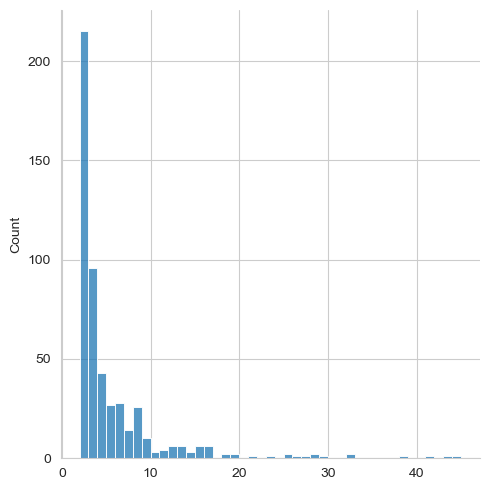

In [14]:
plot_power_law(lfr_graph)